# SPRM Demo - Spatial Process & Relationship Modeling

This notebook provides a demo of SPRM using a small 4 channel test image

## What this notebook does:

1. **Installs SPRM if needed** with all dependencies
2. **Runs the SPRM analysis** on demo data
3. **Displays results** with interactive visualizations

## Prerequisites:
- Download demo files from: https://drive.google.com/drive/folders/1denyZ1SFoWpWrPO9UbSdcF2DvHEv6ovN?usp=sharing
- Place `image_demo.ome.tiff` in the `img/` folder and `mask_demo.ome.tiff` in the `mask/` folder

## Step 1: Environment Setup and Installation

The following cell will:
- Install SPRM and all dependencies if needed
- Set up matplotlib backend for compatibility

**Note**: Jupyter notebooks automatically use the Python environment of the selected kernel. Make sure you're using a kernel with the SPRM environment activated.

In [1]:
import os
import sys
import subprocess
import importlib
from pathlib import Path

# Colors for output
class Colors:
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'

def print_status(message):
    print(f"{Colors.BLUE}[INFO]{Colors.ENDC} {message}")

def print_success(message):
    print(f"{Colors.GREEN}[SUCCESS]{Colors.ENDC} {message}")

def print_warning(message):
    print(f"{Colors.YELLOW}[WARNING]{Colors.ENDC} {message}")

def print_error(message):
    print(f"{Colors.RED}[ERROR]{Colors.ENDC} {message}")

def setup_notebook_environment():
    """Setup notebook environment for SPRM"""
    print_status("Setting up notebook environment...")
    
    # Check if we're in the right directory
    if not (Path("../setup.py").exists() and Path("../sprm").exists()):
        print_error("Please run this notebook from the demo directory")
        return False
    
    # Set matplotlib backend to avoid GUI issues
    os.environ['MPLBACKEND'] = 'Agg'
    print_status("Set matplotlib backend to Agg (non-GUI)")
    
    # Try to import SPRM
    try:
        import sprm
        print_success("SPRM is available in this kernel")
        return True
    except ImportError:
        print_warning("SPRM not found in this kernel")
        print_status("Installing SPRM from parent directory...")
        
        try:
            result = subprocess.run([
                sys.executable, "-m", "pip", "install", ".."
            ], cwd="..", capture_output=True, text=True, check=True)
            
            print_success("SPRM installed successfully!")
            
            # Try importing again
            import sprm
            print_success("SPRM import successful after installation")
            return True
            
        except subprocess.CalledProcessError as e:
            print_error(f"Failed to install SPRM: {e.stderr}")
            print_error("Please install SPRM manually: pip install ..")
            return False
        except ImportError as e:
            print_error(f"SPRM import failed after installation: {e}")
            return False

# Run the setup
if setup_notebook_environment():
    print_success("Notebook environment ready!")
    print_status("Note: This notebook uses the kernel's Python environment")
else:
    print_error("Environment setup failed. Please check the errors above.")


[INFO] Setting up notebook environment...
[INFO] Set matplotlib backend to Agg (non-GUI)
[SUCCESS] SPRM is available in this kernel
[SUCCESS] Notebook environment ready!
[INFO] Note: This notebook uses the kernel's Python environment


## Step 2: Check Demo Files and Run SPRM Analysis

The following cell will:
- Verify that demo files are present
- Run SPRM analysis with proper error handling
- Generate all output files and visualizations


In [2]:
def check_demo_files():
    """Check if demo files exist"""
    print_status("Checking for demo files...")
    
    # Check for image file in img/ subdirectory
    if not Path("img/image_demo.ome.tiff").exists():
        print_error("Demo image file 'img/image_demo.ome.tiff' not found!")
        print_error("Please download demo files from:")
        print_error("https://drive.google.com/drive/folders/1denyZ1SFoWpWrPO9UbSdcF2DvHEv6ovN?usp=sharing")
        print_error("and place them in the img/ and mask/ subdirectories")
        return False
    
    # Check for mask file in mask/ subdirectory
    if not Path("mask/mask_demo.ome.tiff").exists():
        print_error("Demo mask file 'mask/mask_demo.ome.tiff' not found!")
        print_error("Please download demo files from:")
        print_error("https://drive.google.com/drive/folders/1denyZ1SFoWpWrPO9UbSdcF2DvHEv6ovN?usp=sharing")
        print_error("and place them in the img/ and mask/ subdirectories")
        return False
    
    print_success("Demo files found in img/ and mask/ directories")
    return True

def run_sprm_analysis():
    """Run SPRM analysis on demo files"""
    print_status("Starting SPRM analysis...")
    
    # Create output directory
    output_dir = Path("sprm_demo_outputs")
    output_dir.mkdir(exist_ok=True)
    
    # Define SPRM command
    sprm_path = "../SPRM.py"
    cmd = [
        sys.executable, "-u", sprm_path,
        "--img-dir", "img/image_demo.ome.tiff",
        "--mask-dir", "mask/mask_demo.ome.tiff", 
        "--output-dir", "sprm_demo_outputs",
        "--processes", "1"
    ]
    
    print_status(f"Running command: {' '.join(cmd)}")
    
    try:
        # Run SPRM with real-time output
        process = subprocess.Popen(
            cmd,
            stdout=subprocess.PIPE,
            stderr=subprocess.STDOUT,
            text=True,
            bufsize=1,
            universal_newlines=True
        )
        
        # Print output in real-time
        for line in process.stdout:
            print(line.rstrip())
        
        process.wait()
        
        if process.returncode == 0:
            print_success("SPRM analysis completed successfully!")
            print_status("Results saved to: sprm_demo_outputs/")
            return True
        else:
            print_error(f"SPRM analysis failed with return code: {process.returncode}")
            return False
            
    except Exception as e:
        print_error(f"Error running SPRM: {e}")
        return False

# Check demo files and run analysis
if check_demo_files():
    if run_sprm_analysis():
        print_success("SPRM demo completed successfully!")
    else:
        print_error("SPRM analysis failed. Check the output above for details.")
else:
    print_error("Demo files not found. Please download and place them correctly.")


NameError: name 'print_status' is not defined

## Step 3: Display SPRM Results

The following cells will display the generated results:
- **Image quality metrics** (from JSON file)
- **Adjacency graph** (from PDF file)
- **PNG images**: Cell clustering results and analysis plots
- **CSV data**: Feature tables and clustering assignments

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import IFrame
import matplotlib
%matplotlib inline
#path to the output files (same as "output_dir" in Step 2; hardcoded in run_sprm.sh)
folder_path = "sprm_demo_outputs"

## Show image quality metrics

In [4]:
import json
with open(folder_path + "/image_demo.ome.tiff-SPRM_Image_Quality_Measures.json", "r") as f:
    jsoncontent = json.load(f)
print(jsoncontent)

{'Image Information': {'Number of Channels': 4}, 'Image Quality Metrics not requiring image segmentation': {'Signal To Noise Otsu': {'CD31': 19257.30787829519, 'CD45': 10.9687027877365, 'CD8': 13.33564545889658, 'DAPI_2': 5.412687988763175}, 'Signal To Noise Z-Score': {'CD31': 0.0121527634153536, 'CD45': 1.3297948906168422, 'CD8': 0.8293755466561209, 'DAPI_2': 1.5318204052895927}, 'Total Intensity': {'CD31': 1461060.0, 'CD45': 6744156.597502015, 'CD8': 6086255.316594669, 'DAPI_2': 14275355.506136373}}, 'Image Quality Metrics requiring background segmentation': {'1/AvgCVBackground': 0.039340834068856516, 'Fraction of Pixels in Image Background': 0.15112531643550237, 'FractionOfFirstPCBackground': 0.5522051569121561}, 'Image Quality Metrics that require cell segmentation': {'Channel Statistics': {'Average per Cell Ratios': {'CD31': {'Cell / Background': 1286.1299110272744, 'Nuclear / Cell': 0.23557413204118008}, 'CD45': {'Cell / Background': 500.23061432793276, 'Nuclear / Cell': 0.300950

## Pixels colored by the first three principal components of the pixel intensities (the component coefficients are in "*channelPCA_summary.csv")

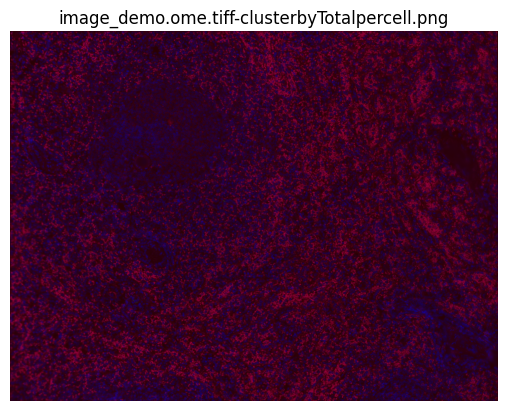

In [ ]:
png_file = "image_demo.ome.tiff-Top3ChannelPCA.png"
image = Image.open(folder_path+"/"+png_file)
plt.figure()
plt.imshow(image)
plt.title(png_file)
plt.axis('off')
plt.show()

## Cell Adjancy Graph shows lines between cells that are within shown distance (in pixels) of each other

In [10]:
import base64
with open(folder_path + "/image_demo.ome.tiff_AdjacencyGraph.pdf", "rb") as pdf:
    content = pdf.read()
# encode PDF
base64_pdf = base64.b64encode(content).decode("utf-8")
# display encoded PDF
IFrame(f"data:application/pdf;base64,{base64_pdf}", width=600, height=400)

## Cells colored by cell cluster after clustering using UMAP embedding of all features

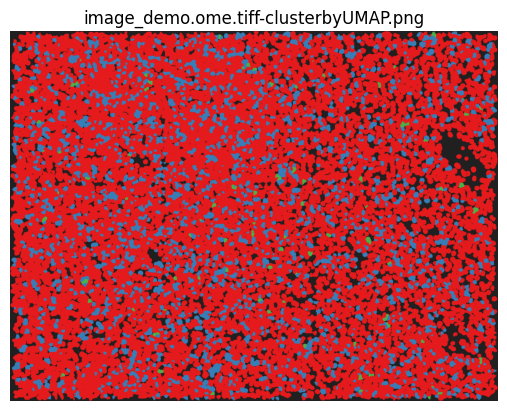

In [5]:
# Get all files in the output folder
files = os.listdir(folder_path)

# Find UMAP file
png_files = [file for file in files if file.find('cluster')>0 and file.find('UMAP')>0 and file.endswith('.png')]

# Display it
for png_file in png_files:
    image_path = os.path.join(folder_path, png_file)
    image = Image.open(image_path)
    plt.figure()
    plt.imshow(image)
    plt.title(png_file)
    plt.axis('off')
    plt.show()

## Cells colored by cell cluster for clustering using different feature sets of whole cells (see the corresponding *cluster_cell_*_legend.pdf files for which markers most distinguish the cell clusters)

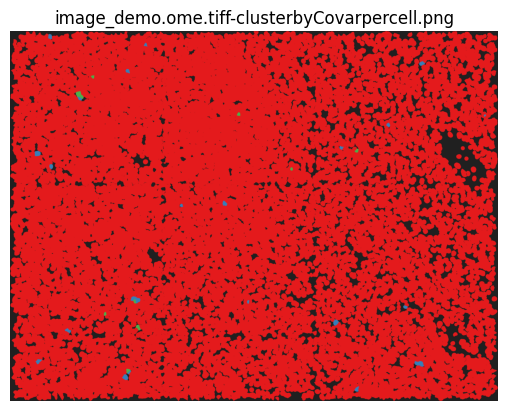

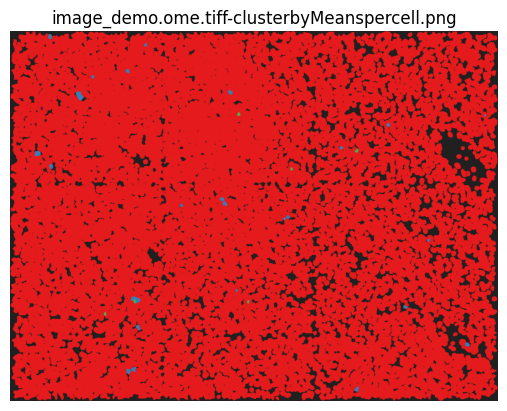

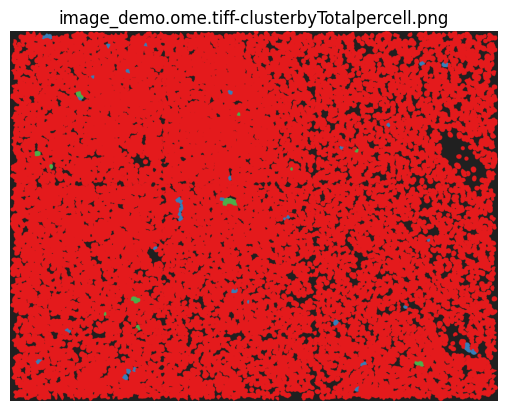

In [6]:
# Find files for clustering on whole cell features (covariance, mean, total)
png_files = [file for file in files if file.find('cluster')>0 and file.find('percell.')>0 and file.endswith('.png')]

# Display the PNG images
for png_file in png_files:
    image_path = os.path.join(folder_path, png_file)
    image = Image.open(image_path)
    #print(png_file)
    plt.figure()
    plt.imshow(image)
    plt.title(png_file)
    plt.axis('off')
    plt.show()

## The cell centers, cell features (in separate files by feature type), and the cluster assignments for each cell (that was not ignored because it was too small or touching the image edge) are contained in CSV files


In [20]:
import pandas as pd
cellcenters = pd.read_csv(folder_path + "/image_demo.ome.tiff-cell_centers.csv")
cellcenters.head()

,ID,x,y,z
0,0,0.0,0.0,0.0
1,1,4.0,2096.0,0.0
2,2,5.0,2643.0,0.0
3,3,5.0,1520.0,0.0
4,4,6.0,1292.0,0.0


In [21]:
cellchannelmean = pd.read_csv(folder_path + "/image_demo.ome.tiff-cell_channel_mean.csv")
cellchannelmean.head()

,ID,CD31,CD45,CD8,DAPI_2
0,19,0.0,1.426337,1.339412,1.960549
1,31,0.0,1.383243,1.637586,1.454641
2,49,0.0,0.659794,0.528512,2.783415
3,52,0.0,1.287008,1.533587,1.975893
4,69,0.0,0.361444,0.264212,1.558617


In [22]:
cellclusters = pd.read_csv(folder_path + "/image_demo.ome.tiff-cell_cluster.csv")
cellclusters.head()

,ID,K-Means [Texture],K-Means [Mean] Expression,K-Means [Covariance] Expression,K-Means [Total] Expression,K-Means [Mean-All-SubRegions] Expression,K-Means [tSNE_All_Features],K-Means [UMAP_All_Features],K-Means [Shape-Vectors],K-Means [Shape-Vectors Normalized]
0,19,1,1,1,1,1,2,3,2,1
1,31,1,1,1,1,1,2,3,1,1
2,49,1,1,1,1,1,2,2,2,2
3,52,1,1,1,1,1,1,3,2,2
4,69,1,1,1,1,1,3,1,1,1
